In [4]:
import pandas as pd
import numpy as np

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
df=pd.read_csv("HepatitisCdata.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [6]:
# Verisetindeki boş değerlerin sayısı
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [7]:
#Verisetindeki kullanılmayan sütun silindi
df.drop("Unnamed: 0", inplace=True, axis= 1)

In [8]:
#Kategorik veriler yine kategorik ancak sayı türündeki kategorik verilere dönüştürüldü.
df['Category'] = df['Category'].replace({'0=Blood Donor': 'Normal', '0s=suspect Blood Donor':'Normal' , '1=Hepatitis': "Hepatitis", '2=Fibrosis': "Fibrosis", '3=Cirrhosis': "Cirrhosis"})
df['Sex'] = df['Sex'].replace({'m': 1, 'f': 0})

In [9]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,Normal,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,Normal,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,Normal,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,Normal,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,Normal,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [10]:
#Verisetindeki tahlil değerlerini 0 veya 1 olarak etiketlenmesi için değer aralıklarına göre işlemler yapıldı.
conditions = [
    (df['ALT'] > 56),
    (df['ALT'] <= 56) & (df['ALT'] >= 7),
    (df['ALT']<7)
    ]
values = [1,0,1]
df['ALT_MAP'] = np.select(conditions, values)

conditions = [
    (df['AST'] > 40),
    (df['AST'] <= 40) & (df['AST'] >= 10),
    (df['AST']<10)
    ]
values = [1,0,1]
df['AST_MAP'] = np.select(conditions, values)

conditions = [
    (df['ALP'] > 147),
    (df['ALP'] <= 147) & (df['ALP'] >= 44),
    (df['ALP']<44)
    ]
values = [1,0,1]
df['ALP_MAP'] = np.select(conditions, values)

conditions = [
    (df['ALB'] > 52),
    (df['ALB'] <= 52) & (df['ALB'] >= 35),
    (df['ALB']<35)
    ]
values = [1,0,1]
df['ALB_MAP'] = np.select(conditions, values)

conditions = [
    (df['BIL'] > 20.5),
    (df['BIL'] <= 20.5) & (df['BIL'] >= 3.4),
    (df['BIL']<3.4)
    ]
values = [1,0,1]
df['BIL_MAP'] = np.select(conditions, values)

conditions = [
    (df['PROT'] > 80),
    (df['PROT'] <= 80) & (df['PROT'] >= 60),
    (df['PROT']<60)
    ]
values = [1,0,1]
df['PROT_MAP'] = np.select(conditions, values)

conditions = [
    (df['GGT'] > 48)&(df['Sex']=='Male'),
    (df['GGT'] <= 48) & (df['GGT'] >= 9) & (df['Sex']=='Male'),
    (df['GGT']<9)&(df['Sex']=='Male'),
    (df['GGT'] > 32)&(df['Sex']=='Female'),
    (df['GGT'] <= 32) & (df['GGT'] >= 9) & (df['Sex']=='Female'),
    (df['GGT']<9)&(df['Sex']=='Female')
    ]
values = [1,0,1,1,0,1]
df['GGT_MAP'] = np.select(conditions, values)

conditions = [
    (df['CREA'] > 106)&(df['Sex']=='Male'),
    (df['CREA'] <= 106) & (df['CREA'] >= 53) & (df['Sex']=='Male'),
    (df['CREA']<53)&(df['Sex']=='Male'),
    (df['CREA'] > 97)&(df['Sex']=='Female'),
    (df['CREA'] <= 97) & (df['CREA'] >= 44) & (df['Sex']=='Female'),
    (df['CREA']<44)&(df['Sex']=='Female')
    ]
values = [1,0,1,1,0,1]
df['CREA_MAP'] = np.select(conditions, values)

conditions = [
 (df['CHOL'] > 5.2),
    (df['CHOL']<=5.2)
    ]
values = [1,0]
df['CHOL_MAP'] = np.select(conditions, values)

conditions = [
    (df['CHE'] > 12),
    (df['CHE'] <= 12) & (df['CHE'] >= 5),
    (df['CHE']<5)
    ]
values = [1,0,1]
df['CHE_MAP'] = np.select(conditions, values)

In [30]:
df.tail()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,...,ALT_MAP,AST_MAP,ALP_MAP,ALB_MAP,BIL_MAP,PROT_MAP,GGT_MAP,CREA_MAP,CHOL_MAP,CHE_MAP
610,1,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,...,1,1,1,1,1,0,0,0,1,0
611,1,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,...,1,1,0,1,0,0,0,0,0,1
612,1,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,...,1,1,0,1,1,1,0,0,0,1
613,1,46,0,33.0,NaN,39.0,62.0,20.0,3.56,4.20,...,0,1,0,1,0,0,0,0,0,1
614,1,59,0,36.0,NaN,100.0,80.0,12.0,9.07,5.30,...,1,1,0,0,0,0,0,0,1,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int64  
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    int64  
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
 13  ALT_MAP   615 non-null    int32  
 14  AST_MAP   615 non-null    int32  
 15  ALP_MAP   615 non-null    int32  
 16  ALB_MAP   615 non-null    int32  
 17  BIL_MAP   615 non-null    int32  
 18  PROT_MAP  615 non-null    int32  
 19  GGT_MAP   615 non-null    int32  
 20  CREA_MAP  615 non-null    int32 

In [12]:
#Etiketli verideki sözel olan kategorik değerler sayısal kategorik değerlere dönüştürüldü.
label_mapping = {
    'Normal': 0,
    'Cirrhosis': 1,
    'Fibrosis': 2,
    'Hepatitis': 3
}


df['Category'] = df['Category'].replace(label_mapping)

In [13]:
#Etiketli veri Y değişkenine aktarıldı.
Y = df["Category"]

In [14]:
#Makine Öğrenmesi algoritmalarına gönderilecek olan eğitim verileri X değişkenine aktarıldı.
X=df[["ALT_MAP","AST_MAP","ALP_MAP","ALB_MAP","BIL_MAP","PROT_MAP","GGT_MAP","CREA_MAP","CHOL_MAP","CHE_MAP"]]

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

classifierKNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifierKA = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifierLG = LogisticRegression(random_state = 0)
classifierRF=RandomForestClassifier(n_estimators=100)


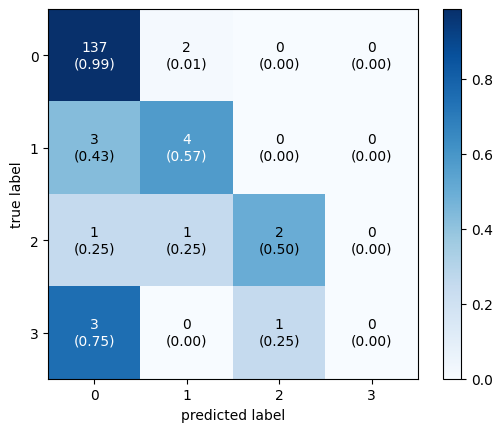

In [16]:
classifierKNN.fit(X_train,y_train)
y_predKNN=classifierKNN.predict(X_test)

accuracy_scoreKNN=mt.accuracy_score(y_test,y_predKNN)

cmKNN = confusion_matrix(y_test,y_predKNN)
plot_confusion_matrix(conf_mat=cmKNN,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

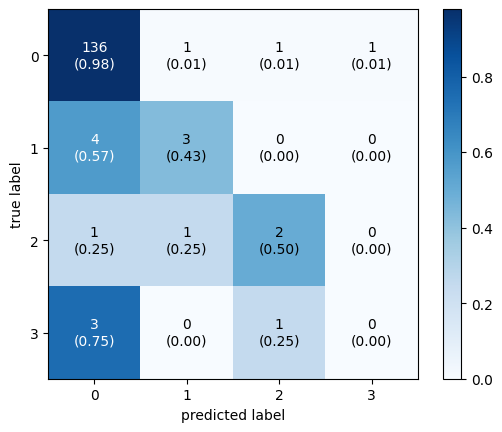

In [17]:
classifierKA.fit(X_train,y_train)
y_predKA=classifierKA.predict(X_test)

accuracy_scoreKA=mt.accuracy_score(y_test,y_predKA)

cmKA = confusion_matrix(y_test,y_predKA)
plot_confusion_matrix(conf_mat=cmKA,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

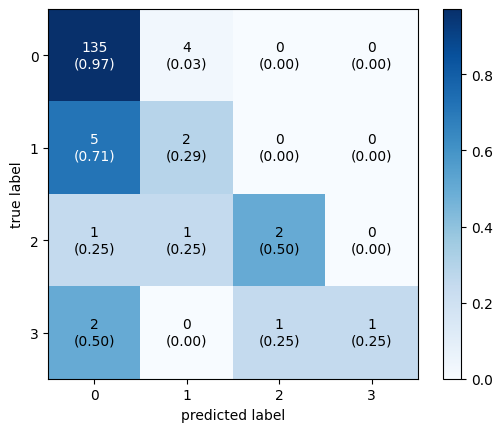

In [18]:
classifierLG.fit(X_train,y_train)
y_predLG=classifierLG.predict(X_test)

accuracy_scoreLG=mt.accuracy_score(y_test,y_predLG)

cmLG = confusion_matrix(y_test,y_predLG)
plot_confusion_matrix(conf_mat=cmLG,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

0.9285714285714286


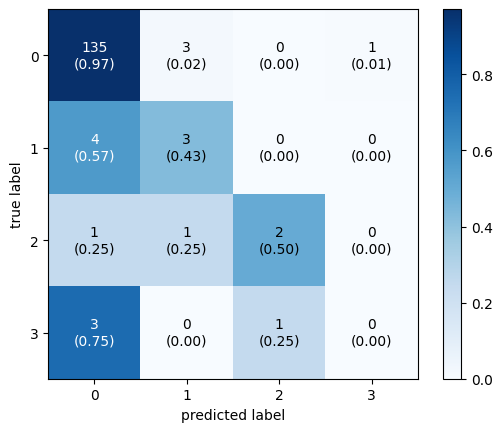

In [19]:
classifierRF.fit(X_train,y_train)
y_predRF=classifierRF.predict(X_test)

accuracy_scoreRF=mt.accuracy_score(y_test,y_predKNN)
print(accuracy_scoreRF)

cmRF = confusion_matrix(y_test,y_predRF)
plot_confusion_matrix(conf_mat=cmRF,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [20]:
accuracies = {}
accuracies['K En Yakın Komşu']=accuracy_scoreKNN
accuracies['Karar Ağacı']=accuracy_scoreKA
accuracies['Lojistik Regresyon']=accuracy_scoreLG
accuracies['Rasgele Orman']=accuracy_scoreRF

C:\Users\erolc\AppData\Local\Temp\ipykernel_19660\1604339365.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)


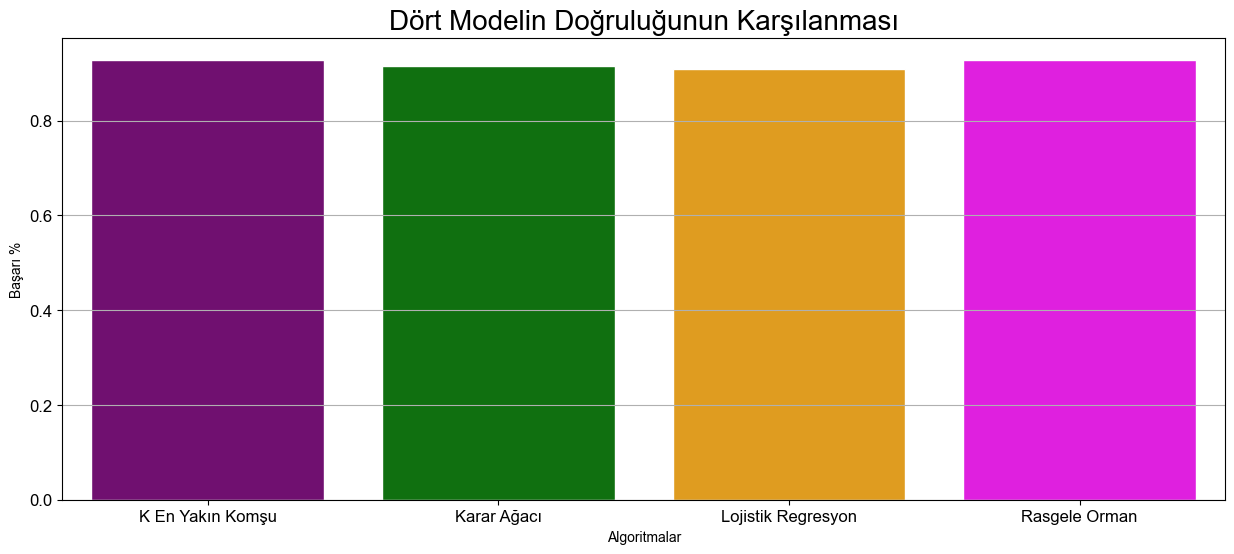

In [21]:
import seaborn as sns
colors = ["purple", "green", "orange", "magenta"]
plt.figure(figsize = (15,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title('Dört Modelin Doğruluğunun Karşılanması', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("Başarı %")
plt.xlabel("Algoritmalar")


plt.show()

In [22]:
df_accuracy = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
df_accuracy.sort_values(by= ['Accuracy'], inplace= True, ascending= False)
df_accuracy

,Model,Accuracy
0,K En Yakın Komşu,0.928571
3,Rasgele Orman,0.928571
1,Karar Ağacı,0.915584
2,Lojistik Regresyon,0.909091


In [23]:
import pickle

filename='KNNModelSon.sav'

pickle.dump(classifierKNN,open(filename,'wb'))